In [1]:
import cv2
import matplotlib.pyplot as NGUYENHANVU

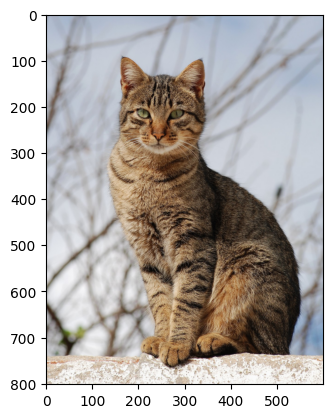

In [2]:
img1 = cv2.imread('cat.jpg')
img1 = img1[:,:,::-1]
NGUYENHANVU.imshow(img1)

Sử dụng boxFilter: cv2.blur() hoặc cv2.boxFilter() để làm mờ ảnh (sử dụng nhiều thông số filter khác nhau), biểu diễn ảnh gốc và ảnh làm mờ cùng nhau để kiểm chứng.  

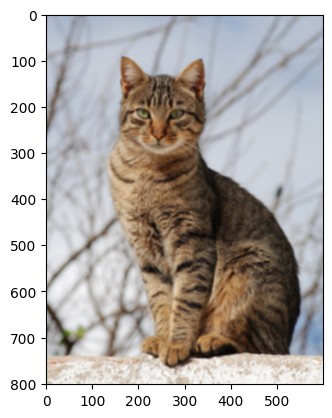

In [3]:
img2= cv2.boxFilter(img1,-1,(5,5))
NGUYENHANVU.imshow(img2)


2.Sử dụng Gaussian Filter # Lưu ý: kích thước bộ lọc là số lẻ.

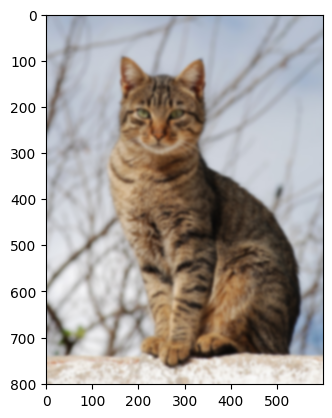

In [4]:
im3=cv2.GaussianBlur(img1,(15,15),0)
NGUYENHANVU.imshow(im3)

3.Sử dụng Median Filter 

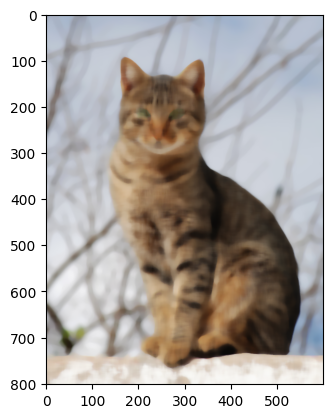

In [5]:
im3=cv2.medianBlur(img1,15,0)
NGUYENHANVU.imshow(im3)

4.Kiểm tra lại các bộ lọc trên với hai hình ảnh pepper noise dưới đây: 

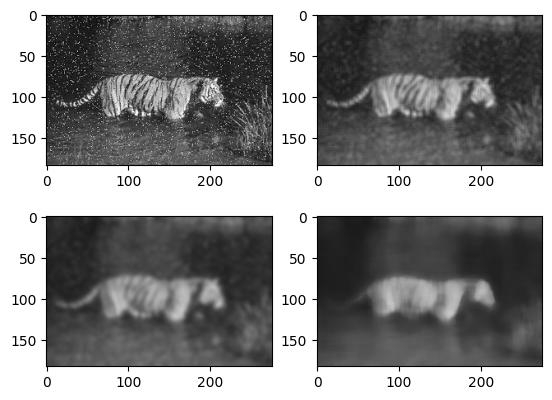

In [6]:
img_pepper0 = cv2.imread('image.png')
img_pepper0 = img_pepper0[:,:,::-1]
NGUYENHANVU.subplot(2,2,1)
NGUYENHANVU.imshow(img_pepper0)

img_pepper0a= cv2.boxFilter(img_pepper0,-1,(5,5))
NGUYENHANVU.subplot(2,2,2)
NGUYENHANVU.imshow(img_pepper0a)


img_pepper0b=cv2.GaussianBlur(img_pepper0,(15,15),0)
NGUYENHANVU.subplot(2,2,3)
NGUYENHANVU.imshow(img_pepper0b)

img_pepper0c=cv2.medianBlur(img_pepper0,15,0)
NGUYENHANVU.subplot(2,2,4)
NGUYENHANVU.imshow(img_pepper0c)


5.Có nhận xét gì về các kích thước filter. 

6.Thực hành với Cân bằng sáng - equalizeHist, để cân bằng sáng, trước hết ta chuyển ảnh trắng đen (nếu có) sang ảnh màu. 

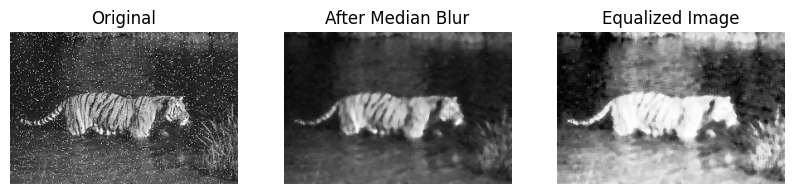

In [7]:
img = cv2.imread('image.png')
blur = cv2.medianBlur(img,5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
equalized = cv2.equalizeHist(blur)

NGUYENHANVU.figure(figsize=(10,4))

NGUYENHANVU.subplot(1,3,1)
NGUYENHANVU.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
NGUYENHANVU.title('Original')
NGUYENHANVU.axis('off')

NGUYENHANVU.subplot(1,3,2)
NGUYENHANVU.imshow(blur, cmap='gray')
NGUYENHANVU.title('After Median Blur')
NGUYENHANVU.axis('off')

NGUYENHANVU.subplot(1,3,3)
NGUYENHANVU.imshow(equalized, cmap='gray')
NGUYENHANVU.title('Equalized Image')
NGUYENHANVU.axis('off')

NGUYENHANVU.show()

7.Bài tập trên lớp lý thuyết: FILTER bằng các phép toán số học và logic
Given two images as follow (with different sizes: 193x157 and 194x160) 

a.Crop two images to size 190x155

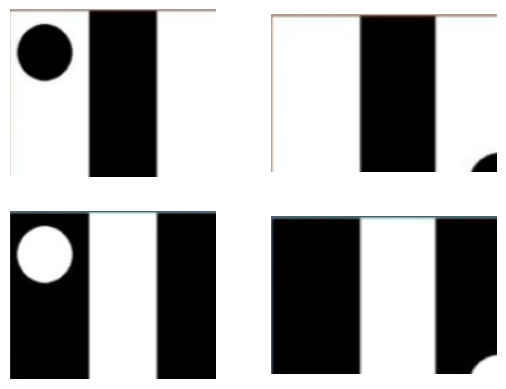

In [15]:


img1 = cv2.imread('exT3_01.jpg')
img2 = cv2.imread('exT3_02.jpg')

img1 = img1[:155, 1:191]
img2 = img2[:133, :190]

inv_img1 = cv2.bitwise_not(img1)
inv_img2 = cv2.bitwise_not(img2)

NGUYENHANVU.subplot(2, 2, 1)
NGUYENHANVU.imshow(img1)    
NGUYENHANVU.axis("off")

NGUYENHANVU.subplot(2, 2, 2)
NGUYENHANVU.imshow(img2)
NGUYENHANVU.axis("off")

NGUYENHANVU.subplot(2, 2, 3)
NGUYENHANVU.imshow(inv_img1)
NGUYENHANVU.axis("off")

NGUYENHANVU.subplot(2, 2, 4)
NGUYENHANVU.imshow(inv_img2)
NGUYENHANVU.axis("off")

NGUYENHANVU.show()

b.Transform images to negative ones.

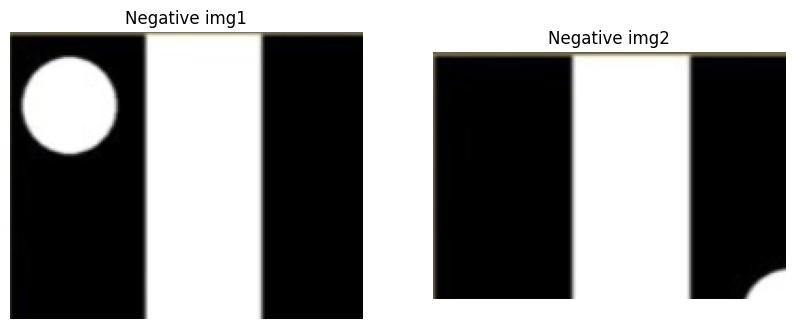

In [18]:
NGUYENHANVU.figure(figsize=(10,6))

NGUYENHANVU.subplot(1, 2, 1)
NGUYENHANVU.imshow(cv2.cvtColor(inv_img1, cv2.COLOR_BGR2RGB))
NGUYENHANVU.title("Negative img1")
NGUYENHANVU.axis("off")

NGUYENHANVU.subplot(1, 2, 2)
NGUYENHANVU.imshow(cv2.cvtColor(inv_img2, cv2.COLOR_BGR2RGB))
NGUYENHANVU.title("Negative img2")
NGUYENHANVU.axis("off")

NGUYENHANVU.show()


c.Process to have an image which has only the “ball”

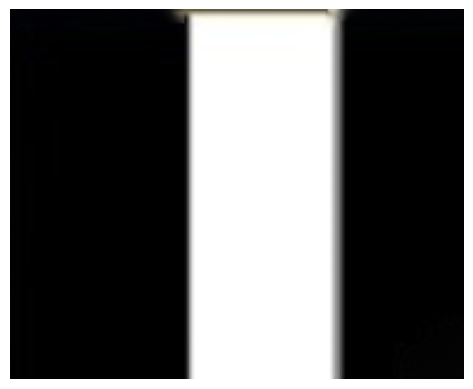

In [13]:
import cv2
import numpy as np

h1, w1 = inv_img1.shape[:2]
h2, w2 = inv_img2.shape[:2]
if (h1, w1) != (h2, w2):
    inv_img2 = cv2.resize(inv_img2, (w1, h1), interpolation=cv2.INTER_AREA)
if inv_img1.ndim == 2:
    inv_img1 = cv2.cvtColor(inv_img1, cv2.COLOR_GRAY2BGR)
if inv_img2.ndim == 2:
    inv_img2 = cv2.cvtColor(inv_img2, cv2.COLOR_GRAY2BGR)
khu_trang = cv2.subtract(inv_img2, inv_img1)
gray = cv2.cvtColor(khu_trang, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 15, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=2)
result = cv2.inpaint(inv_img2, mask, 7, cv2.INPAINT_TELEA)

NGUYENHANVU.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
NGUYENHANVU.axis("off")
NGUYENHANVU.show()


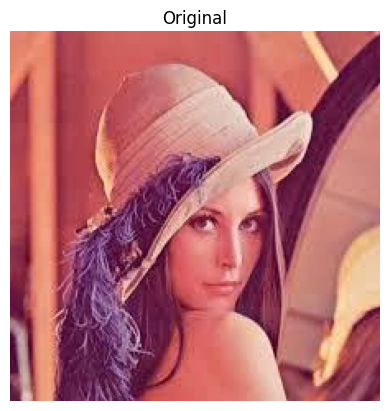

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as NGUYENHANVU

image = cv2.imread("lenna.png")
NGUYENHANVU.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
NGUYENHANVU.axis("off")
NGUYENHANVU.title("Original")
NGUYENHANVU.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


1.Sử dụng Backward, forward, central gradient để lọc ảnh. 

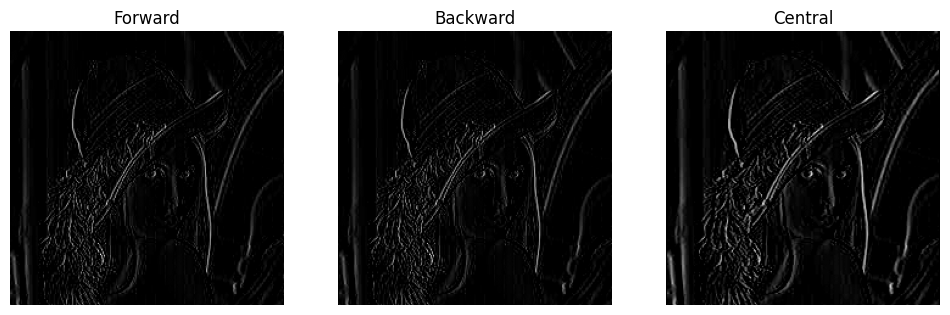

In [20]:
# Forward gradient (dx)
kx_f = np.array([[0, -1, 1]], dtype=np.float32)

# Backward gradient (dx)
kx_b = np.array([[-1, 1, 0]], dtype=np.float32)

# Central gradient (dx)
kx_c = np.array([[-1, 0, 1]], dtype=np.float32) / 2

forward  = cv2.filter2D(gray, -1, kx_f)
backward = cv2.filter2D(gray, -1, kx_b)
central  = cv2.filter2D(gray, -1, kx_c)

NGUYENHANVU.figure(figsize=(12,4))
NGUYENHANVU.subplot(1,3,1); NGUYENHANVU.imshow(forward, cmap="gray");  NGUYENHANVU.title("Forward");  NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,2); NGUYENHANVU.imshow(backward,cmap="gray");  NGUYENHANVU.title("Backward"); NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,3); NGUYENHANVU.imshow(central, cmap="gray");  NGUYENHANVU.title("Central");  NGUYENHANVU.axis("off")
NGUYENHANVU.show()


2) Finite difference filter để lọc ảnh nhiễu

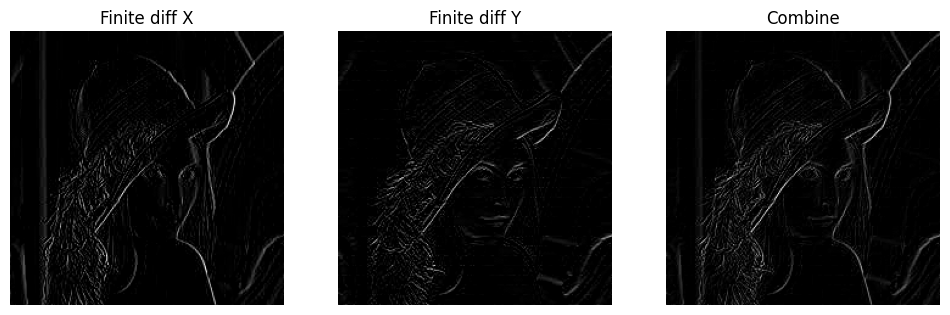

In [21]:
k_fd_x = np.array([[1, -1]], dtype=np.float32)
k_fd_y = np.array([[1], [-1]], dtype=np.float32)

fd_x = cv2.filter2D(gray, -1, k_fd_x)
fd_y = cv2.filter2D(gray, -1, k_fd_y)

fd = cv2.addWeighted(fd_x, 0.5, fd_y, 0.5, 0)

NGUYENHANVU.figure(figsize=(12,4))
NGUYENHANVU.subplot(1,3,1); NGUYENHANVU.imshow(fd_x, cmap="gray"); NGUYENHANVU.title("Finite diff X"); NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,2); NGUYENHANVU.imshow(fd_y, cmap="gray"); NGUYENHANVU.title("Finite diff Y"); NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,3); NGUYENHANVU.imshow(fd,   cmap="gray"); NGUYENHANVU.title("Combine");       NGUYENHANVU.axis("off")
NGUYENHANVU.show()


3) Gaussian filter để lọc ảnh

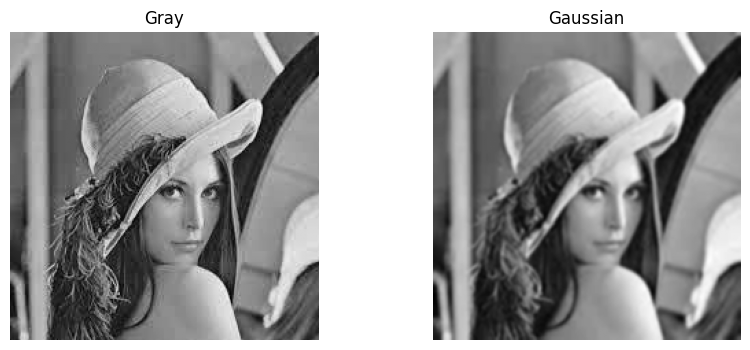

In [22]:
gauss = cv2.GaussianBlur(gray, (5, 5), 0)

NGUYENHANVU.figure(figsize=(10,4))
NGUYENHANVU.subplot(1,2,1); NGUYENHANVU.imshow(gray,  cmap="gray"); NGUYENHANVU.title("Gray");     NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,2,2); NGUYENHANVU.imshow(gauss, cmap="gray"); NGUYENHANVU.title("Gaussian"); NGUYENHANVU.axis("off")
NGUYENHANVU.show()


4) Sobel detector để xác định biên

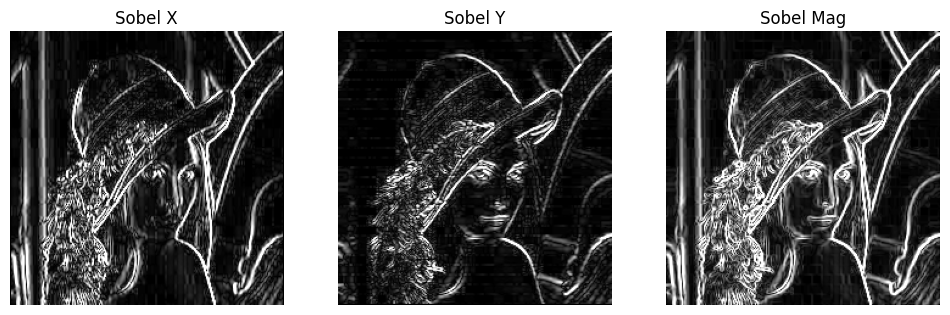

In [23]:
sx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

mag = cv2.magnitude(sx, sy)
sobel_edge = cv2.convertScaleAbs(mag)

NGUYENHANVU.figure(figsize=(12,4))
NGUYENHANVU.subplot(1,3,1); NGUYENHANVU.imshow(cv2.convertScaleAbs(sx), cmap="gray"); NGUYENHANVU.title("Sobel X"); NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,2); NGUYENHANVU.imshow(cv2.convertScaleAbs(sy), cmap="gray"); NGUYENHANVU.title("Sobel Y"); NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,3,3); NGUYENHANVU.imshow(sobel_edge, cmap="gray");              NGUYENHANVU.title("Sobel Mag"); NGUYENHANVU.axis("off")
NGUYENHANVU.show()





5) Canny edge detector để xác định cạnh

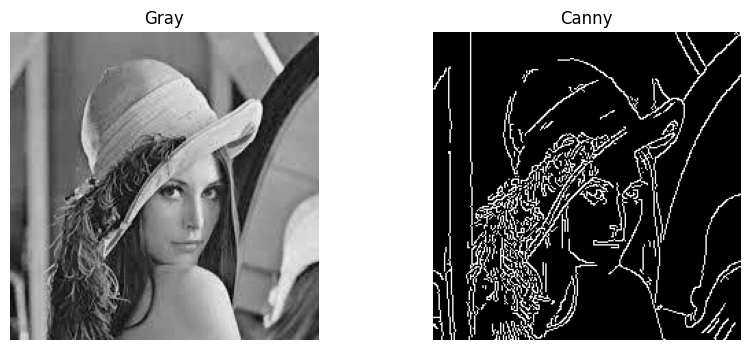

In [24]:
edges = cv2.Canny(gray, 100, 200)

NGUYENHANVU.figure(figsize=(10,4))
NGUYENHANVU.subplot(1,2,1); NGUYENHANVU.imshow(gray,  cmap="gray"); NGUYENHANVU.title("Gray");  NGUYENHANVU.axis("off")
NGUYENHANVU.subplot(1,2,2); NGUYENHANVU.imshow(edges, cmap="gray"); NGUYENHANVU.title("Canny"); NGUYENHANVU.axis("off")
NGUYENHANVU.show()


6) Hough transform để xác định đường thẳng

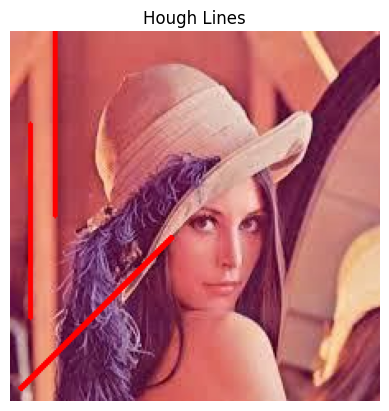

In [25]:
edges = cv2.Canny(gray, 100, 200)

lines = cv2.HoughLinesP(
    edges,
    rho=1,
    theta=np.pi/180,
    threshold=100,
    minLineLength=50,
    maxLineGap=10
)

img_lines = image.copy()
if lines is not None:
    for x1, y1, x2, y2 in lines[:, 0]:
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

NGUYENHANVU.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
NGUYENHANVU.axis("off")
NGUYENHANVU.title("Hough Lines")
NGUYENHANVU.show()
